# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [162]:
import numpy as np
from scipy.optimize import differential_evolution

In [163]:
import matplotlib.pyplot as plt

In [164]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [165]:
strategy = [ 'best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']


## strategy

In [166]:
iters = []

In [167]:
for i in range(0,len(strategy)):
    result = differential_evolution(ackley, bounds,strategy = strategy[i],seed=42)
    iters.append(result.nit)

In [168]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,5

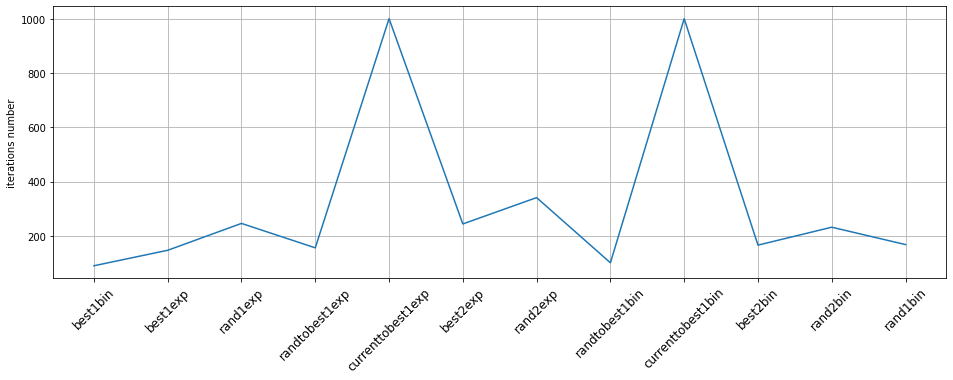

In [169]:
plt.figure()
plt.plot(strategy, iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

## popsize

In [170]:
popsize = [1,5,10,20,50,100]

In [171]:
iters = []

In [172]:
for i in range(0,len(popsize)):
    result = differential_evolution(ackley, bounds,popsize = popsize[i],seed=42)
    iters.append(result.nit)

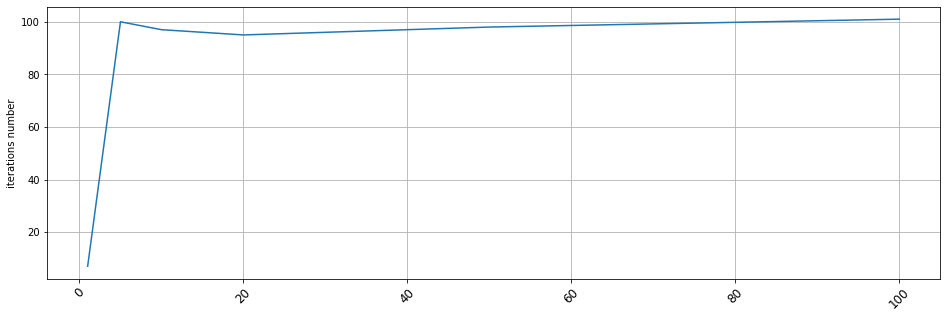

In [173]:
plt.figure()
plt.plot(popsize, iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

## tol

In [174]:
tol = [1e-1,1e-3,1e-5,1e-10]

In [175]:
iters = []

In [176]:
for i in range(0,len(tol)):
    result = differential_evolution(ackley, bounds,tol = tol[i],seed=42)
    iters.append(result.nit)

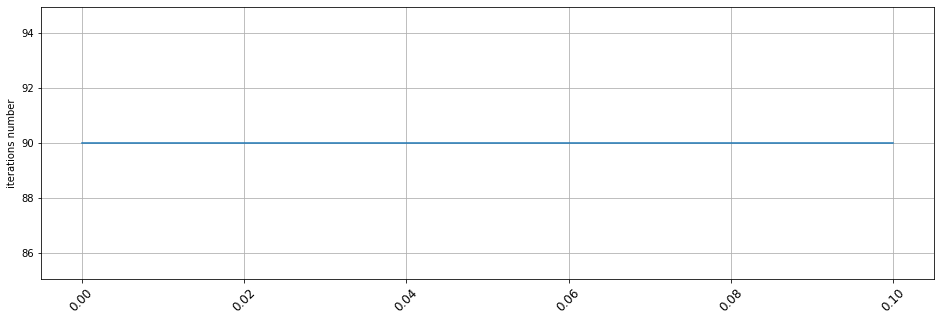

In [177]:
plt.figure()
plt.plot(tol, iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

## mutation

In [178]:
mutation = [0, 0.1, 0.5,1,1.5,1.9]

In [179]:
iters = []

In [180]:
for i in range(0,len(mutation)):
    result = differential_evolution(ackley, bounds,mutation = mutation[i],seed=42)
    iters.append(result.nit)

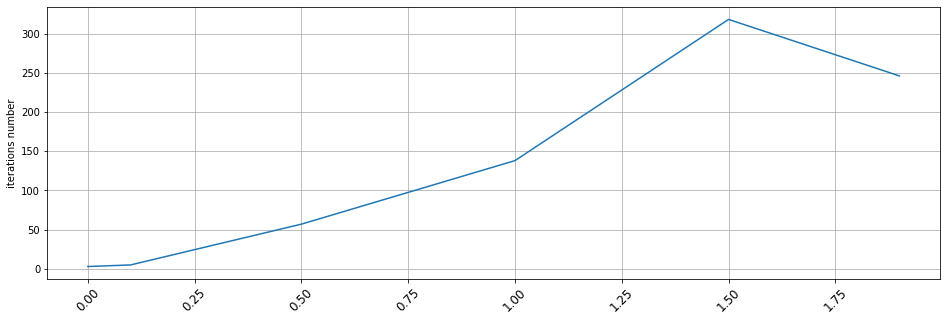

In [181]:
plt.figure()
plt.plot(mutation, iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

## recombination

In [182]:
recombination = [0, 0.1, 0.2 ,0.3 ,0.5 ,0.8, 0.99]

In [183]:
iters = []

In [184]:
for i in range(0,len(recombination)):
    result = differential_evolution(ackley, bounds,recombination = recombination[i],seed=42)
    iters.append(result.nit)

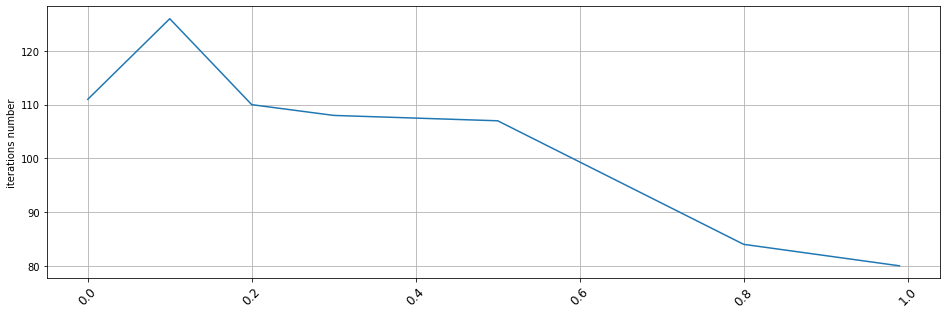

In [185]:
plt.figure()
plt.plot(recombination, iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

## updating

In [186]:
updating = ['immediate', 'deferred']

In [187]:
iters = []

In [188]:
for i in range(0,len(updating)):
    result = differential_evolution(ackley, bounds,updating = updating[i],seed=42)
    iters.append(result.nit)

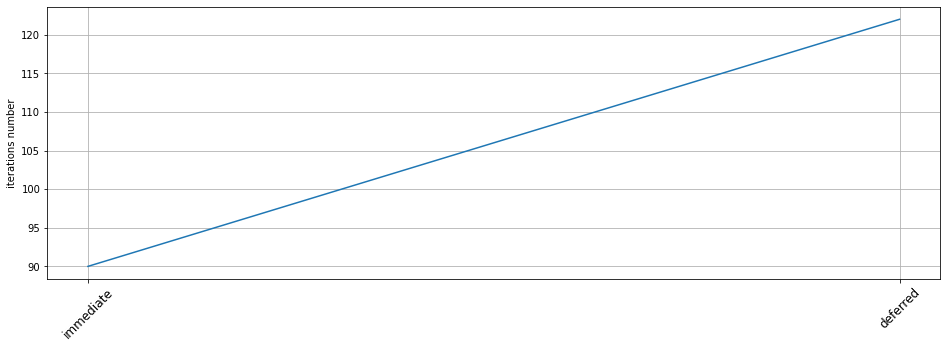

In [189]:
plt.figure()
plt.plot(updating,iters)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('iterations number')
plt.grid(b='on')

In [190]:
min_ter = 1000

In [191]:
params = {'mutation':'','updating':'','tol':0, 'strategy':'', 'recombination':0,'popsize':0}

In [ ]:
for s in strategy:
    for u in updating:
        for r in recombination:
            for m in mutation:
                for t in tol:
                    for p in popsize:
                        result = differential_evolution(ackley, bounds,updating = u,tol = t, strategy = s, recombination = r, popsize = p, mutation = m, seed=42)
                        if result.nit < min_ter:
                            min_ter = result.nit
                            params['mutation'] = m
                            params['updating'] = u
                            params['tol'] = t
                            params['strategy'] = s
                            params['recombination'] = r
                            params['popsize'] = p
                        
                        
                    
                
            
    

In [ ]:
print(f'Минимальное количество итераций: {min_ter}, параметры: {params}')